Details:

https://academic.oup.com/jnci/article/104/4/311/979947

> Single sample predictors (SSPs) and Subtype classification models (SCMs) are gene expression–based classifiers used to identify the four primary molecular subtypes of breast cancer (basal-like, HER2-enriched, luminal A, and luminal B). SSPs use hierarchical clustering, followed by nearest centroid classification, based on large sets of tumor-intrinsic genes. SCMs use a mixture of Gaussian distributions based on sets of genes with expression specifically correlated with three key breast cancer genes (estrogen receptor [ER], HER2, and aurora kinase A [AURKA]). The aim of this study was to compare the robustness, classification concordance, and prognostic value of these classifiers with those of a simplified three-gene SCM in a large compendium of microarray datasets.

AURKA

ER is ESR1 (Source: https://www.genecards.org/cgi-bin/carddisp.pl?gene=ESR1)

HER2 is ERBB2 (Source: https://www.genecards.org/cgi-bin/carddisp.pl?gene=ERBB2)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Customize this for each notebook

In [100]:
OUTPUT_DIR='Three-Gene-Model/'
OPTIONS={'seed':3}
PREFIX="_".join([f"{key}={OPTIONS[key]}" for key in OPTIONS.keys()])
RESULTS={}
PREFIX

'seed=2'

In [101]:
from pathlib import Path
home = str(Path.home())

In [102]:
KNOWLEDGE_LIB=f'{home}/knowledgelib'

In [103]:
from IPython.display import display, Markdown, Latex
import sys
sys.path.insert(0,f'{KNOWLEDGE_LIB}')
import pyknowledge
import pandas as pd
import scipy.io
import pandas as pd
import numpy as np
import joblib

## Load the input data

In [104]:
## Customize this load to read in the data and format it with the correct columns
def load_data_all(seed):
    mat = scipy.io.loadmat("/disk/metabric/BRCA1View20000.mat")
    #gene_labels = open("/disk/metabric/gene_labels.txt").read().split("\n")
    gene_labels = [g[0] for g in mat['gene'][0]]
    df = pd.DataFrame(mat['data'].transpose(), columns=gene_labels)
    [n_dim, n_sample] = df.shape
    for i in range(n_dim):
        m1 = min(df.iloc[:,i])
        m2 = max(df.iloc[:,i])
        df.iloc[:,i] =(df.iloc[:,i] - m1)/(m2 - m1)
    df['target'] = mat['targets']
    df['Subtype'] = df.target.map({1:'Basal',2:'HER2+',3:'LumA',4:'LumB',5:'Normal Like',6:'Normal'})
    df['color'] = df.target.map({1:'red',2:'green',3:'purple',4:'cyan',5:'blue',6:'green'})
    df['graph_color'] = df.target.map({1:'#FFFFFF',2:'#F5F5F5',3:'#FFFAFA',4:'#FFFFF0',5:'#FFFAF0',6:'#F5FFFA'})
    index = joblib.load(f'/disk/metabric/index_{seed}.joblib.z')    
    df = df.iloc[index,:]
    df = df.set_index(np.arange(len(df)))
    

    return df

def load_data_train(seed):
    mat = scipy.io.loadmat("/disk/metabric/BRCA1View20000.mat")
    df = joblib.load(f'/disk/metabric/data_train_{seed}.joblib.z')
    gene_labels = [g[0] for g in mat['gene'][0]]
    targets_train = joblib.load(f'/disk/metabric/targets_train_{seed}.joblib.z')
    df.columns = gene_labels
    #df = pd.DataFrame(data_train, columns=gene_labels)
    targets_train = joblib.load(f'/disk/metabric/targets_train_{seed}.joblib.z')
    df['target'] = targets_train.apply(lambda x: x.idxmax(),axis=1)+1
    df['Subtype'] = df.target.map({1:'Basal',2:'HER2+',3:'LumA',4:'LumB',5:'Normal Like',6:'Normal'})
    df['color'] = df.target.map({1:'red',2:'green',3:'purple',4:'cyan',5:'blue',6:'green'})
    df['graph_color'] = df.target.map({1:'#FFFFFF',2:'#F5F5F5',3:'#FFFAFA',4:'#FFFFF0',5:'#FFFAF0',6:'#F5FFFA'})
    return df

In [105]:
df_all = load_data_all(OPTIONS['seed'])

In [106]:
df_all.Subtype.value_counts() # basal-like, HER2-enriched, luminal A, and luminal B

LumA           721
LumB           491
Basal          330
HER2+          239
Normal Like    202
Normal         150
Name: Subtype, dtype: int64

In [107]:
df = load_data_train(OPTIONS['seed'])

In [108]:
df.tail()

,SCGB2A2,MUCL1,SCGB1D2,PIP,LOC648852,DNAJA2,TFF3,S100P,CPB1,CEACAM6,...,LOC647149,LOC642453,LOC652100,LOC646050,LOC644912,LOC652294,target,Subtype,color,graph_color
1531,0.971282,0.937868,0.870855,0.823022,0.063152,0.055722,0.737957,0.500586,0.156037,0.818945,...,0.237089,0.141377,0.463293,0.622493,0.311053,0.353203,5,Normal Like,blue,#FFFAF0
1532,0.972699,0.957861,0.761642,0.797040,0.057760,0.546377,0.381086,0.836993,0.144146,0.968224,...,0.724497,0.347504,0.488052,0.419393,0.343753,0.297809,2,HER2+,green,#F5F5F5
1533,0.126903,0.570433,0.093868,0.446824,0.550588,0.079482,0.746925,0.210197,0.114989,0.103867,...,0.451643,0.237302,0.231668,0.298626,0.216646,0.347634,4,LumB,cyan,#FFFFF0
1534,0.958274,0.738396,0.768081,0.178423,0.182369,0.058660,0.614815,0.809328,0.068429,0.383612,...,0.269624,0.433395,0.428648,0.549008,0.393003,0.250198,2,HER2+,green,#F5F5F5
1535,0.788745,0.361317,0.621826,0.296258,0.481079,0.351843,0.908244,0.130399,0.889563,0.166720,...,0.547349,0.562970,0.376068,0.440849,0.507116,0.302387,3,LumA,purple,#FFFAFA


In [109]:
df_val = df_all.iloc[len(df):(len(df)+170),:]
df_val

,SCGB2A2,MUCL1,SCGB1D2,PIP,LOC648852,DNAJA2,TFF3,S100P,CPB1,CEACAM6,...,LOC647149,LOC642453,LOC652100,LOC646050,LOC644912,LOC652294,target,Subtype,color,graph_color
1536,0.149482,0.029041,0.065228,0.793461,0.345664,0.448087,0.737957,0.090704,0.296708,0.163739,...,5.067842,5.303556,5.359223,5.367297,5.269897,5.806632,3,LumA,purple,#FFFAFA
1537,0.960072,0.344148,0.948171,0.082703,0.232482,0.574545,0.809173,0.465325,0.031043,0.321536,...,5.148672,5.431259,5.366996,5.294044,5.475920,5.215574,2,HER2+,green,#F5F5F5
1538,0.406110,0.629520,0.200703,0.357015,0.667892,0.513789,0.824092,0.690444,0.675187,0.288769,...,5.235961,5.284853,5.921032,5.456638,5.475131,5.248950,4,LumB,cyan,#FFFFF0
1539,0.235046,0.220280,0.128177,0.977617,0.300262,0.033347,0.632166,0.037545,0.234640,0.249090,...,5.065716,5.562073,5.343130,5.339394,5.285006,5.814988,3,LumA,purple,#FFFAFA
1540,0.654491,0.902258,0.349919,0.604912,0.102082,0.089404,0.563265,0.318824,0.070222,0.399068,...,5.191142,5.438587,5.418440,5.284438,5.388795,5.418826,1,Basal,red,#FFFFFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,0.425971,0.363369,0.095592,0.860654,0.464077,0.046788,0.652794,0.756538,0.091199,0.885472,...,5.325742,5.201583,5.302575,5.344111,5.269089,5.309271,2,HER2+,green,#F5F5F5
1702,0.859044,0.663453,0.586111,0.457538,0.795600,0.628677,0.894460,0.908634,0.301530,0.488753,...,4.918110,5.463847,5.479268,5.355125,5.031397,5.474959,4,LumB,cyan,#FFFFF0
1703,0.911462,0.957861,0.336269,0.885777,0.559540,0.072809,0.793777,0.813184,0.107883,0.579940,...,4.948502,5.255610,5.161655,5.300424,5.158465,5.494977,2,HER2+,green,#F5F5F5
1704,0.783165,0.381345,0.557174,0.195798,0.144147,0.081597,0.547673,0.748181,0.430636,0.473884,...,5.349014,5.423898,5.268720,5.425597,5.312770,5.502866,4,LumB,cyan,#FFFFF0


## Knowledge

#### Genes

In [110]:
knowledge_genes = ["ERBB2","ESR1","AURKA"]

In [111]:
genes_df = pyknowledge.common.subset_columns(df,knowledge_genes)
genes_df.head()

,ESR1,AURKA,ERBB2
0,0.293030,0.248161,0.376675
1,0.754403,0.325610,0.203401
2,0.883320,0.182163,0.498362
3,0.686752,0.378598,0.463450
4,0.691268,0.147751,0.427773


In [112]:
genes_df_all = pyknowledge.common.subset_columns(df_all,knowledge_genes+["Subtype"])
genes_df_all.head()

,ESR1,AURKA,ERBB2,Subtype
0,0.293030,0.248161,7.015589,Basal
1,0.754403,0.325610,6.409165,LumB
2,0.883320,0.182163,7.441470,LumA
3,0.686752,0.378598,7.319283,LumB
4,0.691268,0.147751,7.194420,LumA


In [113]:
genes_df_all.to_csv('genes_df_all.csv')

In [114]:
genes_df_all['Subtype'].value_counts()

LumA           721
LumB           491
Basal          330
HER2+          239
Normal Like    202
Normal         150
Name: Subtype, dtype: int64

## EDA

### Each gene individually

In [115]:
source = genes_df.join(df[['Subtype','target']]).melt(id_vars=['Subtype','target'])
source.columns = ["Subtype","target","Gene","Value"]
counts = source.groupby('Subtype')['target'].count().to_frame()
counts.columns = ['Count']
source = source.set_index('Subtype').join(counts).reset_index()
# use the url approach to keep notebook smaller
#url = f'{OUTPUT_DIR}/{PREFIX}_three_gene_model_to_graph_fig1.json'
#pyknowledge.plot.prepare_url(source,url)
# TODO: Figure out what happened to this graph
#pyknowledge.plot.histogram_1(url,'Value','Subtype','Gene',file=f'{OUTPUT_DIR}/{PREFIX}_three_gene_model_to_graph_fig1.png')

## Pipeline

I want this to look like a sklearn pipeline optimization where we can do a grid search. What is our objective function?

In [116]:
transformer = pyknowledge.transformers.ScaleTransformer()
methods = list(transformer.distributions.set_index('method').index)
methods

['Unscaled data',
 'Data after standard scaling',
 'Data after min-max scaling',
 'Data after max-abs scaling',
 'Data after robust scaling',
 'Data after power transformation (Yeo-Johnson)',
 'Data after power transformation (Box-Cox)',
 'Data after quantile transformation (uniform pdf)',
 'Data after quantile transformation (gaussian pdf)',
 'Data after sample-wise L2 normalizing']

In [117]:
import copy
import itertools
import json
from sklearn.pipeline import Pipeline

# Here you define your pipeline
pipe_factory = [['scaler',  lambda params: pyknowledge.transformers.ScaleTransformer(**params)],
                ['feature', lambda params: pyknowledge.transformers.FeatureSelector(**params)],
                ['knn', lambda params: pyknowledge.transformers.KNNTransformer(**params)]]
                #['distribution', lambda params: pyknowledge.transformers.DistributionTransformer(**params)]]

# Here you specify what arguments you want to search across
param_grid = {
    'scaler__method': ['Unscaled data',
                       'Data after standard scaling',
                       'Data after min-max scaling',
                       'Data after robust scaling'
                      ],
    'feature__columns': [knowledge_genes]
}

def grid_search(X,sub_types,pipe_factory,param_grid,sub_type_subset=None):
    test_dfs = []
    
    grouped = {}
    for key in param_grid.keys():
        key2,key3 = key.split("__")
        if key2 not in grouped:
            grouped[key2] = {}
        grouped[key2][key3] = param_grid[key]
    n = []

    for k in grouped.keys():
        n1 = []
        for k2 in grouped[k].keys():
            for v in grouped[k][k2]:
                n1.append((k,k2,v))
        n.append(n1)
    

    param_options = list(itertools.product(*n))
    
    if sub_type_subset is not None:
        mask = sub_types.isin(sub_type_subset)
        X = X.loc[mask]
        sub_types = sub_types[mask]

    results = None

    #print(param_options[0:3], '\n\n\n')
    for param_options1 in param_options:
        
        steps = []
        step_params = {}
        for step_name,func in pipe_factory:
            #print(step_name, func)
            cloned_params = {}
            for k1,k2,value in param_options1:
                #print(k1, k2, value)
                if k1 == step_name:
                    cloned_params[k2] = value
                    step_params[f"{step_name}__{k2}"] = value
            steps.append((step_name,func(cloned_params)))

        index_cols = list(step_params.keys())
        results1 = pd.DataFrame([],columns=['obj1']+index_cols)
        for k in index_cols:
            v = step_params[k]
            if type(v) == list:
                v = tuple(v)
            results1.loc[0,k] = v

        pipe = Pipeline(steps)
        pipe.fit(X,sub_types)
        distances, indices, labels = pipe.transform(X)
        
        sum_obj = 0
        c = 0
        for i,sub_type in enumerate(sub_types):
            count = np.sum(labels[i,:] == sub_type)
            sum_obj += count
        obj1 = sum_obj/len(sub_types)/labels.shape[1]

        results1.loc[0,'obj1'] = obj1
        
        results1.set_index(index_cols,inplace=True)
        
        if results is None:
            results = results1
        else:
            results = results.append(results1)
            
    return results.infer_objects()

In [118]:
genes_df_sample = genes_df.copy()
sub_type_subset=['Normal like', 'HER2+', 'LumB', 'LumA']
results = grid_search(genes_df_sample,df.loc[genes_df_sample.index]['Subtype'],pipe_factory,param_grid,sub_type_subset=sub_type_subset)

In [119]:
results

,,obj1
scaler__method,feature__columns,
Unscaled data,"(ERBB2, ESR1, AURKA)",0.697967
Data after standard scaling,"(ERBB2, ESR1, AURKA)",0.687964
Data after min-max scaling,"(ERBB2, ESR1, AURKA)",0.698290
Data after robust scaling,"(ERBB2, ESR1, AURKA)",0.691836


In [120]:
for_latex = results.reset_index()
for_latex.columns = ['Scaling method','Genes','Leave-one-out CV']
print(for_latex.to_latex())

\begin{tabular}{lllr}
\toprule
{} &               Scaling method &                 Genes &  Leave-one-out CV \\
\midrule
0 &                Unscaled data &  (ERBB2, ESR1, AURKA) &          0.697967 \\
1 &  Data after standard scaling &  (ERBB2, ESR1, AURKA) &          0.687964 \\
2 &   Data after min-max scaling &  (ERBB2, ESR1, AURKA) &          0.698290 \\
3 &    Data after robust scaling &  (ERBB2, ESR1, AURKA) &          0.691836 \\
\bottomrule
\end{tabular}



In [121]:
RESULTS['grid_search_results'] = results

## Get the best parameters

In [122]:
best_params = {}
best = results['obj1'].idxmax()
for i,c in enumerate(results.index.names):
    best_params[c] = best[i]
best_params

{'scaler__method': 'Data after min-max scaling',
 'feature__columns': ('ERBB2', 'ESR1', 'AURKA')}

In [123]:
RESULTS['best_params'] = best_params

In [124]:
steps = []
for name,func in pipe_factory:
    params = {}
    for key in best_params.keys():
        fields = key.split("__")
        if f"{name}__" in key:
            if type(best_params[key]) == tuple:
                best_params[key] = list(best_params[key])
            params[fields[1]] = best_params[key]
    steps.append((name,func(params)))

X = genes_df_sample.copy()
sub_types = df.loc[genes_df_sample.index]['Subtype'].copy()
if sub_type_subset is not None:
    mask = sub_types.isin(sub_type_subset)
    X = X.loc[mask]
    sub_types = sub_types[mask]
    df_mask = df.loc[genes_df_sample.index].loc[mask]
    
pipeline = Pipeline(steps)
pipeline.fit(X,sub_types)

Pipeline(steps=[('scaler',
                 ScaleTransformer(method='Data after min-max scaling')),
                ('feature',
                 FeatureSelector(columns=['ERBB2', 'ESR1', 'AURKA'])),
                ('knn', KNNTransformer())])

In [125]:
X.shape

(1033, 3)

In [126]:
RESULTS['pipeline'] = None # TODO: fix this so it pickles

In [127]:
distances, indices, labels = pipeline.transform(X)

In [128]:
labels

array([['LumB', 'LumB', 'LumB'],
       ['LumA', 'LumA', 'LumA'],
       ['LumB', 'LumB', 'LumB'],
       ...,
       ['LumB', 'LumB', 'LumA'],
       ['HER2+', 'HER2+', 'HER2+'],
       ['LumA', 'LumB', 'LumB']], dtype=object)

In [129]:
labels

array([['LumB', 'LumB', 'LumB'],
       ['LumA', 'LumA', 'LumA'],
       ['LumB', 'LumB', 'LumB'],
       ...,
       ['LumB', 'LumB', 'LumA'],
       ['HER2+', 'HER2+', 'HER2+'],
       ['LumA', 'LumB', 'LumB']], dtype=object)

### Visualize our graph

In [130]:
from IPython.display import Image

import networkx as nx

A = pd.DataFrame(index=df_all.index,columns=df_all.index)

G = nx.Graph()
for ix in df.index:
    c = df.loc[ix,'graph_color']
    G.add_node(ix,color='black',style='filled',fillcolor=c)

for i in range(len(indices)):
    iix = df_mask.index[i] # this is wonky one
    for j,ix in enumerate(indices[i,:]):
        jix = df_mask.index[indices[i,j]]
        if labels[i,j] == sub_types.iloc[i]:
            G.add_edge(iix,jix)
            A.loc[iix,jix] = 1
            A.loc[jix,iix] = 1

In [131]:
RESULTS['A'] = A

In [132]:
len(df)

1536

In [133]:
len(df_mask)

1033

In [134]:
A.to_csv(f"{OUTPUT_DIR}{PREFIX}_graph.csv",)

In [135]:
f"{OUTPUT_DIR}{PREFIX}_graph.csv"

'Three-Gene-Model/seed=2_graph.csv'

/opt/tljh/user/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.472815 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


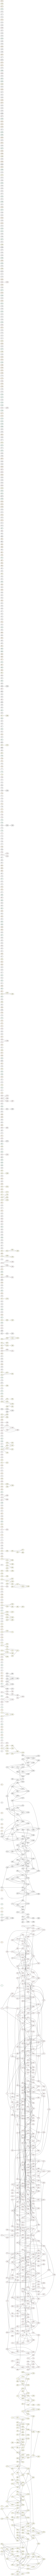

In [136]:
def save(A,file="graph.png"):
    g = A.draw(format=file.split(".")[-1], prog='dot')
    open(file,"wb").write(g)
    return Image(g)

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
A = nx.nx_agraph.to_agraph(G)
A.graph_attr["rankdir"] = "LR"
# draw it in the notebook
save(A,file=f"{OUTPUT_DIR}{PREFIX}_graph.png")

In [137]:
!mkdir {OUTPUT_DIR}{PREFIX}_graphs

In [138]:
graphs = list(G.subgraph(c).copy() for c in nx.connected_components(G))

for i,graph in enumerate(graphs):
    pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
    A = nx.nx_agraph.to_agraph(graph)
    A.graph_attr["rankdir"] = "LR"
    # draw it in the notebook
    save(A,file=f"{OUTPUT_DIR}{PREFIX}_graphs/graph_{i}.png")

In [139]:
import joblib
joblib.dump(RESULTS,f'{OUTPUT_DIR}{PREFIX}_RESULTS.joblib.z')

['Three-Gene-Model/seed=2_RESULTS.joblib.z']

### Validtaion

In [140]:
df_val.columns

Index(['SCGB2A2', 'MUCL1', 'SCGB1D2', 'PIP', 'LOC648852', 'DNAJA2', 'TFF3',
       'S100P', 'CPB1', 'CEACAM6',
       ...
       'LOC647149', 'LOC642453', 'LOC652100', 'LOC646050', 'LOC644912',
       'LOC652294', 'target', 'Subtype', 'color', 'graph_color'],
      dtype='object', length=20004)

In [141]:
X = pyknowledge.common.subset_columns(df_val,knowledge_genes)

In [142]:
X

,ESR1,AURKA,ERBB2
1536,0.674742,0.284224,7.513019
1537,0.361649,0.529230,8.612743
1538,0.724784,0.544249,6.672260
1539,0.832429,0.273056,7.266066
1540,0.271655,0.208417,6.916087
...,...,...,...
1701,0.098969,0.385219,8.412947
1702,0.676972,0.341992,6.574580
1703,0.109495,0.482404,6.758314
1704,0.637561,0.346504,7.436161


In [143]:
distances, indices, labels = pipeline.transform(X)

In [144]:
A = pd.DataFrame(index=df_all.index,columns=df_all.index)

for i in range(len(indices)):
    iix = df_val.index[i]
    for j,ix in enumerate(indices[i,:]):
        jix = df_mask.index[indices[i,j]]
        A.loc[iix,jix] = 1
        A.loc[jix,iix] = 1

In [145]:
A.shape

(2133, 2133)

In [146]:
A.stack()

129   1622    1
      1623    1
231   1536    1
      1537    1
      1538    1
             ..
1704  755     1
      800     1
1705  231     1
      755     1
      800     1
Length: 1020, dtype: object

In [147]:
A.to_csv(f"{OUTPUT_DIR}{PREFIX}_graph_val.csv",)